# 가나의 건강 시설 현황

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
path = './datasets'
file0 = 'health-facilities-gh.csv'
file1 = 'health-facility-tiers.csv'

In [23]:
df0 = pd.read_csv(path+os.sep+file0)
df1 = pd.read_csv(path+os.sep+file1)

In [24]:
df0.shape, df1.shape

((3756, 8), (1475, 3))

In [25]:
df0.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [26]:
df1.head()

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2


In [27]:
df0.FacilityName.nunique()

3544

In [28]:
df1.Facility.nunique()

1446

In [29]:
# unique 한 갯수가 다르지만, 일단 시설이름을 기준으로 붙여본다.
d0 = df0.set_index('FacilityName')
d1 = df1.set_index('Facility')

In [30]:
d = d0.join(d1.drop(columns='Region'))

In [33]:
d.Tier.isna().mean() #병원 이름이 같지 않아서, 제대로 통합이 되지 않는다.

1000 Acre CHPS                                True
1st Foundation Clinic                         True
2BN Military Hospital                         True
37 Military Hospital                          True
3MRS-Liberation Barracks                      True
4 Medical Research Station                    True
441 Welfare Association Clinic                True
6mrs Kamina Health Centre                     True
7 MRS (Military Hospital)                     True
A. B. Bokazo Clinic                           True
A.A.B.L Clinic                                True
A.B Bokazo CHPS                               True
A.B.A. Hospital                               True
A.M.E Zion Clinic                             True
ABF Medical Center                            True
ABTS Clinic                                   True
AG Timbers Clinic                             True
Abaasa Health Centre                          True
Abakrampa Health Centre                       True
Abamkrom RCH                   

In [41]:
df0.head()
df0 = df0.dropna()

In [53]:
import geopandas as gpd
import folium
from folium import plugins

incidents=folium.map.FeatureGroup()
Lat=df0.Latitude.mean()
Lon=df0.Longitude.mean()
ghana = folium.Map([Lat,Lon],zoom_start=7)
i=0
incidents2=plugins.MarkerCluster().add_to(ghana)
for lat,lon,label in zip(df0.Latitude, df0.Longitude, df0.FacilityName):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
    i=i+1
    if i>1500:break
ghana.add_child(incidents2)
ghana


In [48]:
df0.columns

Index(['Region', 'District', 'FacilityName', 'Type', 'Town', 'Ownership',
       'Latitude', 'Longitude'],
      dtype='object')

In [56]:
df0.describe()

,Latitude,Longitude
count,3587.000000,3587.000000
mean,6.998896,-1.054387
std,1.690556,1.010915
min,4.796180,-3.235880
25%,5.706730,-1.762210
50%,6.526680,-1.021190
75%,7.493830,-0.212370
max,11.146670,1.191440


In [57]:
df0.groupby('District').mean()

,Latitude,Longitude
District,,
Abura-Asebu-Kwamankese,5.270879,-1.214651
Accra Metropolitan,5.575643,-0.210154
Adaklu-Anyigbe,6.424600,0.647800
Adansi North,6.253477,-1.519381
Adansi South,6.054610,-1.491935
Afigya-Kwabre,6.814925,-1.561672
Agona East,5.636000,-0.718052
Agona West Municipal,5.554110,-0.742993
Ahafo-Ano North,6.954673,-2.207457


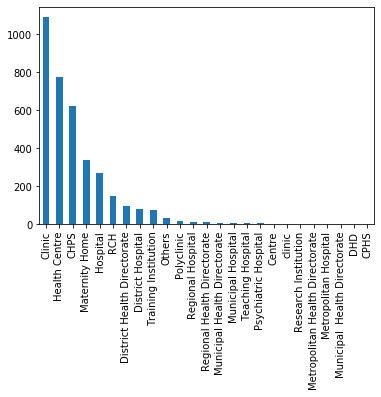

In [58]:
df0.Type.value_counts().plot.bar()